# Task 2
### SVM-based model for recognizing handwritten digits from the MNIST set

## Imports


In [1]:
import numpy as np
import pandas as pd
import keras

In [2]:
from keras.datasets import mnist
# загрузка MNIST
# i_train - обучающая выборка, i_test - тестовая выборка, i = x || y
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

Размер каждого изображения 28x28, в массиве для обучения 60000 элементов
##### Подготовка данных

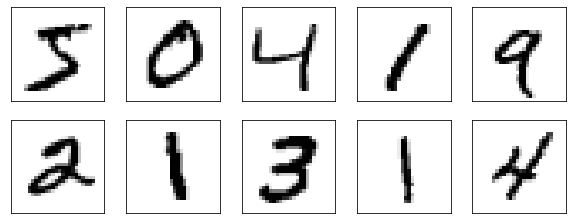

In [3]:
# отображение первых 10 изображений из обучающей выборки
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
 
plt.show()

Преобразуем матрицу 28x28 (размер изображения) в вектор из 784 элементов и линеаризуем изображение.
Значения элементов: [0;1], 0 - черный, 1 - белый

In [4]:
pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], pixels).astype('float32')
# стандартизация входных данных, значения х будут принадлежать [0;1]
x_train = x_train / 255 # изображение размера 28x28, каждый пиксель имеет значение от 0 до 255
x_test = x_test / 255

##### Обучение

In [9]:
import sklearn.svm as svm
model = svm.LinearSVC(dual = True, max_iter = 10000)
model.fit(x_train, y_train)

LinearSVC(max_iter=10000)

##### Расчет и построение confusion matrix - оценка точности классификации

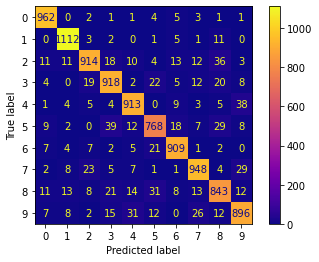

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test, cmap = plt.cm.plasma)

##### Точность

In [7]:
model.score(x_test, y_test) # проверяем точность на тренировочных данных

0.9186